In [258]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [259]:
methods = ['No_Deconv', 'FPFS',
           'Richard-Lucy(10)', 'Richard-Lucy(20)', 
           'Richard-Lucy(30)', 'Richard-Lucy(50)', 'Richard-Lucy(100)',
           'Unrolled_ADMM(1)', 'Unrolled_ADMM(2)', 'Unrolled_ADMM(4)', 'Unrolled_ADMM(8)']
snrs = [100, 20, 10]
y_lims = {'100':[0, 0.23], '20':[0, 0.25], '10':[0, 0.5]}
text_bias = {'100':[(0.0035, -1.1e-3), (-0.0085, -5e-4), 
                    (0.004, -1.5e-3), (0.004, -1.5e-3), (0.003, 0), (0.003, -1.8e-3), (0.004, -1.8e-3), 
                    (-0.0013, -4.3e-3), (-0.008, -1.6e-3), (-0.008, 0), (-0.008, -1.5e-3)],
             '20':[(0.003, 0), (0.003, -1.1e-3), 
                   (0.004, -1.5e-3), (0.004, -1.5e-3), (-0.008, -1.5e-3), (0.003, 0), (0.004, -1.8e-3), 
                   (-0.008, -3.8e-3), (-0.008, -1.3e-3), (0.003, 0), (-0.008, -1.6e-3)],
             '10':[(-0.015, -1.1e-3), (0.005, -5e-4), 
                   (0.005, -1.3e-3), (-0.014, 0), (0, 1e-4), (0.004, 0), (0.005, -1.8e-3), 
                   (-0.012, -4.2e-3), (-0.012, -1.5e-3), (0.004, 0), (-0.013, -1.6e-3)]}
texts = ['(10)', '(20)', '(30)', '(50)', '(100)', '(1)', '(2)', '(4)', '(8)']


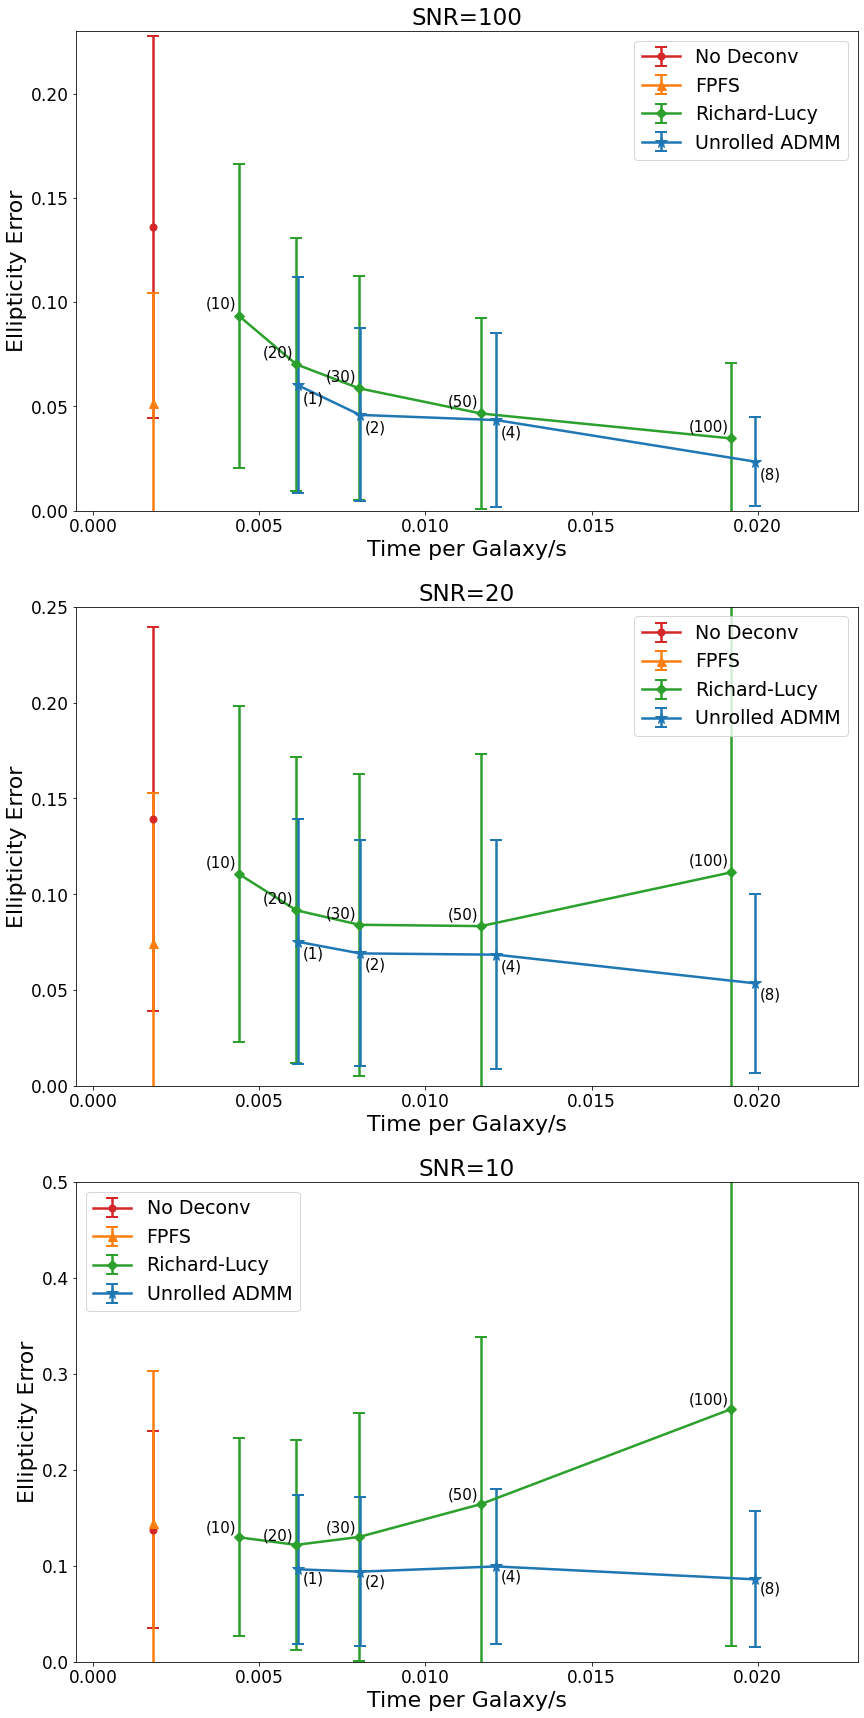

In [260]:
fig = plt.figure(figsize=(14,30), facecolor='white')
for idx, snr in enumerate(snrs):
    ax1 = plt.subplot(3,1,idx+1)
    shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
    for method in methods:
        results_file = os.path.join('results', method, f'results.json')
        with open(results_file, 'r') as f:
            results = json.load(f)
        if method == 'No_Deconv':
            gt_shear = np.array(results[str(snr)]['gt_shear'])
        total_time, n_gal = results['time']
        rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
        ts.append(total_time/n_gal)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))

    ax1.errorbar(ts[0:1], g_errs[0:1], yerr=g_stds[0:1], linewidth=2.5, capsize=6, capthick=2, marker='o', markersize = 7, color='tab:red', label='No Deconv')
    ax1.errorbar(ts[1:2], g_errs[1:2], yerr=g_stds[1:2], linewidth=2.5, capsize=6, capthick=2, marker='^', markersize = 9, color='tab:orange', label='FPFS')
    ax1.errorbar(ts[2:7], g_errs[2:7], yerr=g_stds[2:7], linewidth=2.5, capsize=6, capthick=2, marker='D', markersize = 6.5, color='tab:green', label='Richard-Lucy')
    ax1.errorbar(ts[7:11], g_errs[7:11], yerr=g_stds[7:11], linewidth=2.5, capsize=6, capthick=2, marker='*', markersize = 11.7, color='tab:blue', label='Unrolled ADMM')
    bias = np.array(text_bias[str(snr)][2:])
    for k, (t, g_err, text, bias_y, bias_x) in enumerate(zip(ts[2:], g_errs[2:], texts, bias[:,0], bias[:,1])):
        bias_x = -1e-3 if k<=3 else (1.5e-4 if k>=5 else -1.3e-3)
        bias_y = (0.005 if k<=4 else -0.015) if idx==2 else (0.0035 if k<=4 else -0.0085)
        ax1.text(t+bias_x, g_err+bias_y, text, fontsize=15)
        
    ax1.set_xlim([-0.0005, 0.023])
    ax1.set_ylim(y_lims[str(snr)])
    ax1.set_ylabel('Ellipticity Error', fontsize=22)
    ax1.set_xlabel('Time per Galaxy/s', fontsize=22)
    plt.tick_params(labelsize=17)
    plt.legend(fontsize=19)
    plt.title(f'SNR={snr}', fontsize=23)

plt.savefig(os.path.join('figures', f'time_err.jpg'), bbox_inches='tight')

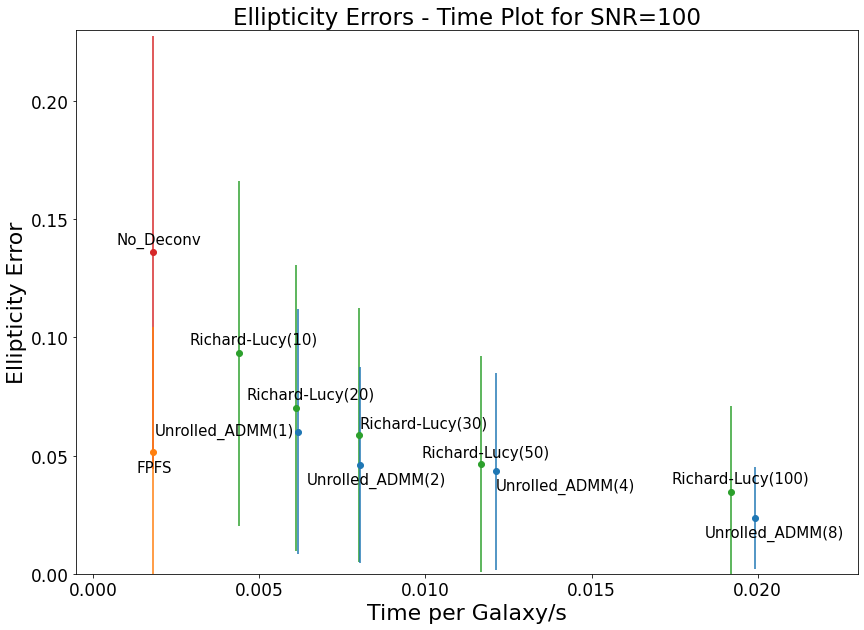

In [261]:
snr = 100

fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
for method in methods:
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_Deconv':
        gt_shear = np.array(results[str(snr)]['gt_shear'])
    total_time, n_gal = results['time']
    rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
    ts.append(total_time/n_gal)
    g_errs.append(np.mean(rec_err[:,2]))
    g_stds.append(np.std(rec_err[:,2]))

text_bias = [(0.0035, -1.1e-3), (-0.0085, -5e-4), 
             (0.004, -1.5e-3), (0.004, -1.5e-3), (0.003, 0), (0.003, -1.8e-3), (0.004, -1.8e-3), 
             (-0.0013, -4.3e-3), (-0.008, -1.6e-3), (-0.008, 0), (-0.008, -1.5e-3)]
for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    bias = -0.01 if 'ADMM' in method else 0.004
    ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
    ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
ax1.set_xlim([-0.0005, 0.023])
ax1.set_ylim([0., 0.23])
ax1.set_ylabel('Ellipticity Error', fontsize=22)
ax1.set_xlabel('Time per Galaxy/s', fontsize=22)

plt.tick_params(labelsize=17)
plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')

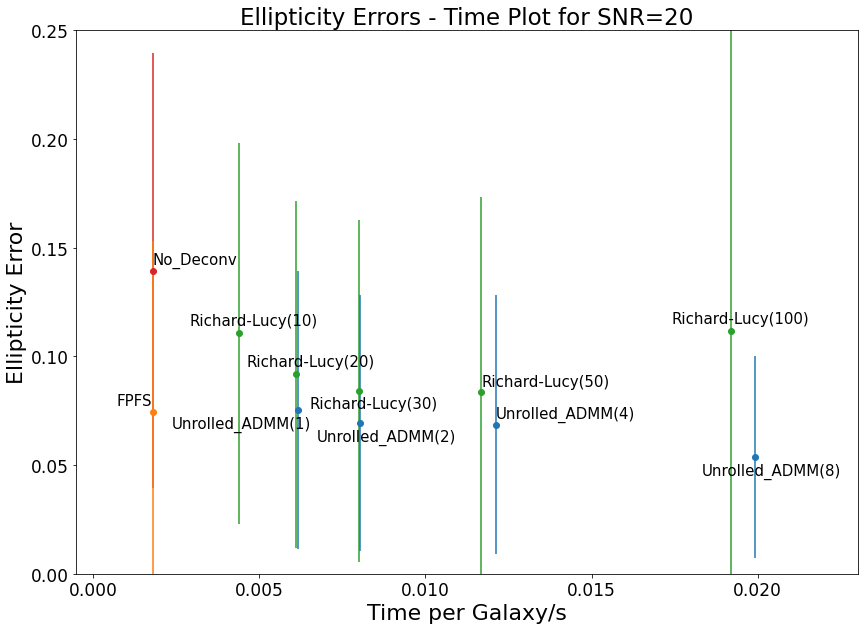

In [262]:
snr = 20

fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
for method in methods:
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_Deconv':
        gt_shear = np.array(results[str(snr)]['gt_shear'])
    total_time, n_gal = results['time']
    rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
    ts.append(total_time/n_gal)
    g_errs.append(np.mean(rec_err[:,2]))
    g_stds.append(np.std(rec_err[:,2]))

text_bias = [(0.003, 0), (0.003, -1.1e-3), 
             (0.004, -1.5e-3), (0.004, -1.5e-3), (-0.008, -1.5e-3), (0.003, 0), (0.004, -1.8e-3), 
             (-0.008, -3.8e-3), (-0.008, -1.3e-3), (0.003, 0), (-0.008, -1.6e-3)]
for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    bias = -0.01 if 'ADMM' in method else 0.004
    ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
    ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
ax1.set_xlim([-0.0005, 0.023])
ax1.set_ylim([0, 0.25])
# plt.yscale('log')
ax1.set_ylabel('Ellipticity Error', fontsize=22)
ax1.set_xlabel('Time per Galaxy/s', fontsize=22)

plt.tick_params(labelsize=17)
plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')

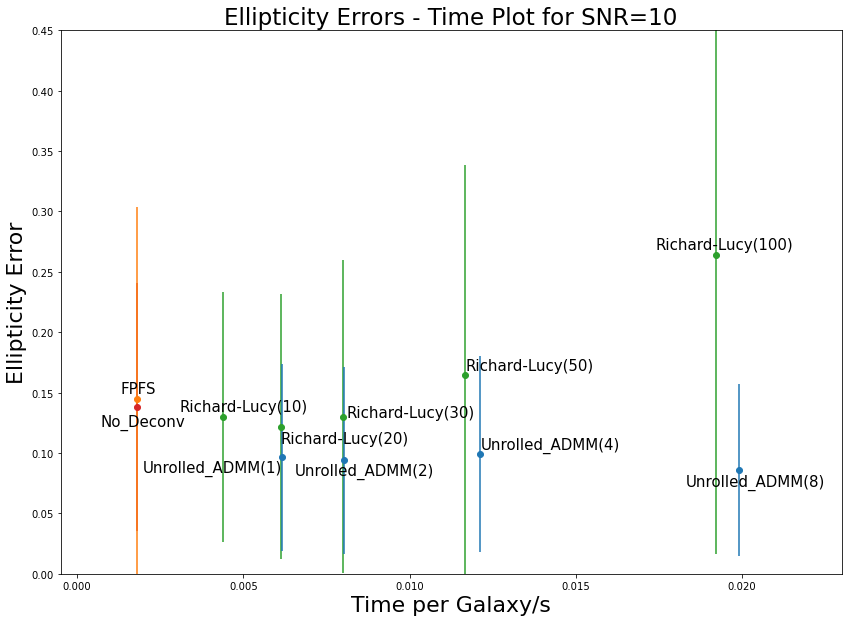

In [263]:
snr = 10

fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
for method in methods:
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_Deconv':
        gt_shear = np.array(results[str(snr)]['gt_shear'])
    total_time, n_gal = results['time']
    rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
    ts.append(total_time/n_gal)
    g_errs.append(np.mean(rec_err[:,2]))
    g_stds.append(np.std(rec_err[:,2]))


text_bias = [(-0.015, -1.1e-3), (0.005, -5e-4), 
             (0.005, -1.3e-3), (-0.014, 0), (0, 1e-4), (0.004, 0), (0.005, -1.8e-3), 
             (-0.012, -4.2e-3), (-0.012, -1.5e-3), (0.004, 0), (-0.013, -1.6e-3)]
for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    bias = -0.01 if 'ADMM' in method else 0.004
    ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
    ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
ax1.set_xlim([-0.0005, 0.023])
ax1.set_ylim([0, 0.45])
# plt.yscale('log')
ax1.set_ylabel('Ellipticity Error', fontsize=22)
ax1.set_xlabel('Time per Galaxy/s', fontsize=22)
plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')